# Video: Plotting Numeric Targets vs One Input Variable

This video shows how to plot the relationship between individual input variables and a numeric target variable.

## Plotting Numeric Targets vs One Input Variable

If we have a target column to model, focus charts on the relationship between that column and input columns.

Script:
* Most of the time that we get a dataset, we will be tasked with predicting a target or output column in that dataset from the other input columns.
* In that case, we should spend extra effort exploring the relationship between that target column and the input columns.
* This will be in contrast to just calling scatter matrix and calling it a day, since most of those charts will not include the target.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/main/data/abalone.tsv", sep="\t")

Script:
* The most basic charts to explore these relationships will still be scatter plots.
* We will just focus on pairs of our target variable and one input instead.
* For the abalone dataset, the target variable is the number of rings.

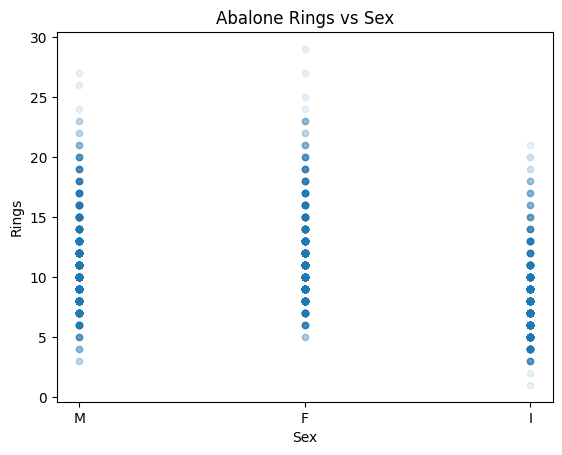

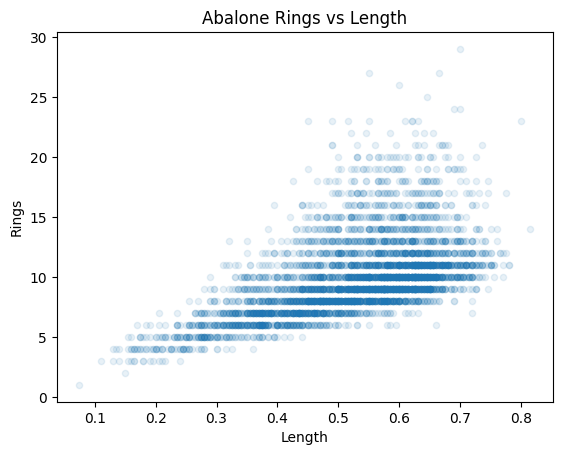

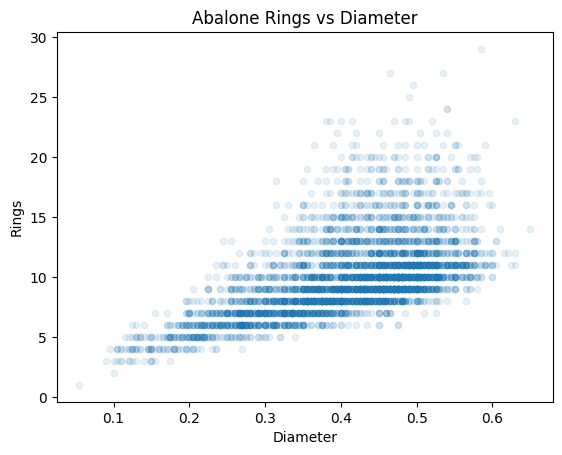

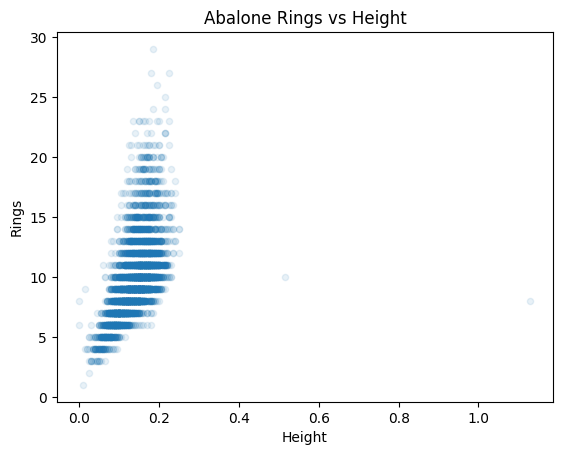

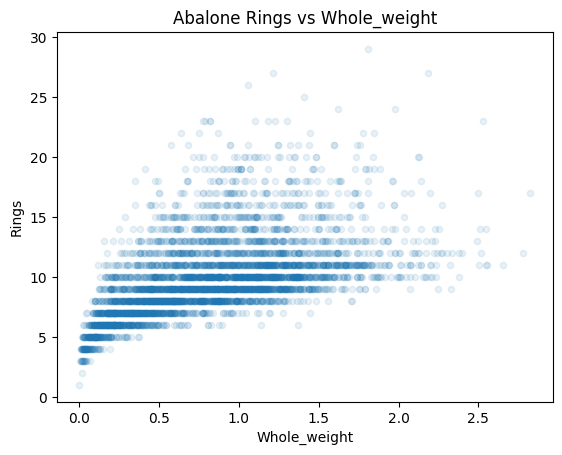

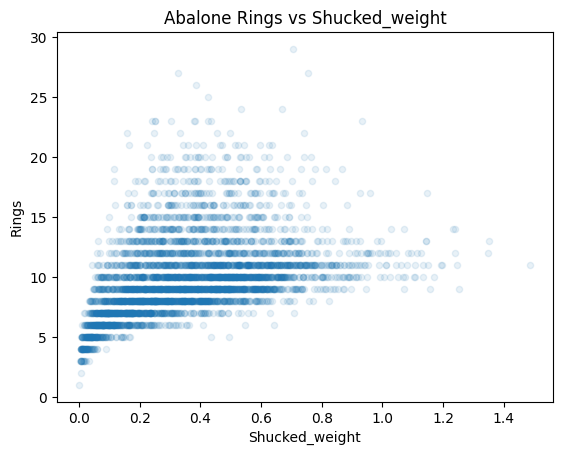

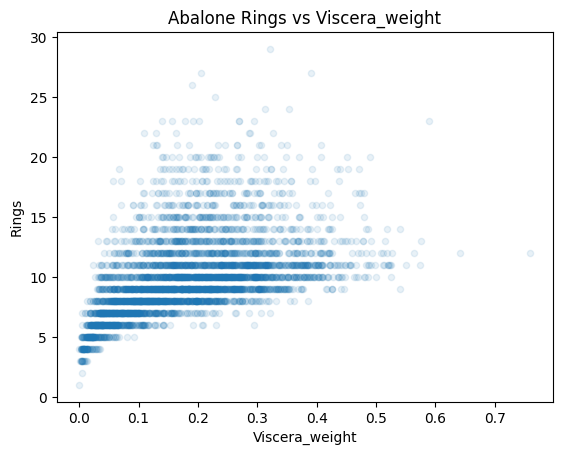

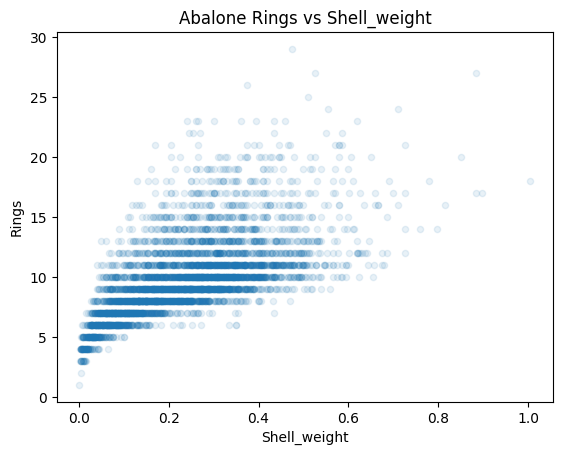

In [ ]:
for c in abalone.columns:
    if c == "Rings":
        continue

    abalone.plot.scatter(c, "Rings", alpha=0.1)
    plt.xlabel(c)
    plt.ylabel("Rings")
    plt.title(f"Abalone Rings vs {c}")
    plt.show()

Script:
* All of these charts for numeric input columns show a monotonic relationship between input columns and the number of the rings.
* So as the input value increases, the number of rings tends to go up.
* But some of them show more vertical spread than the others.
* Are the ones with a tighter vertical range more predictive?
* We will come back to that later.
* Another pattern visible in all those charts is horizontal striping.
* All the points plotted lie along a smaller set of horizontal lines.
* That is because the number of rings is always an integer, a whole number, so there are consistent gaps between different numbers of rings.
* An alternative to these scatter plots is box plots.

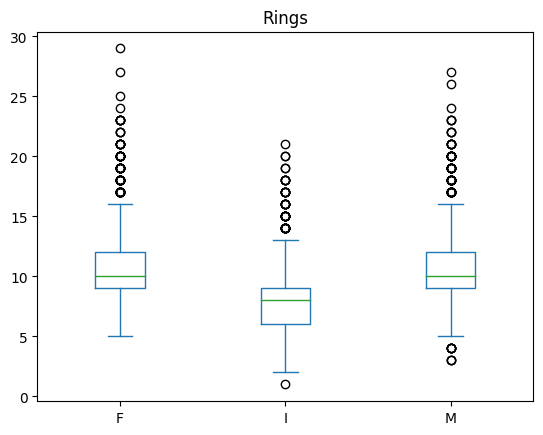

In [ ]:
abalone.plot.box(column="Rings", by="Sex")
None

Script:
* With the default settings, the box shows the range from 25th and 75th percentiles, and the green line inside the box shows the median or 50th percentile.
* The whiskers show 1.5x the box height farther in each direction, and any outliers past the whiskers are individually plotted with some alpha to show the density by color.
* One disadvantage of box plots is that they don't work well with lots of distinct x values.


Rings    Axes(0.125,0.11;0.775x0.77)
dtype: object

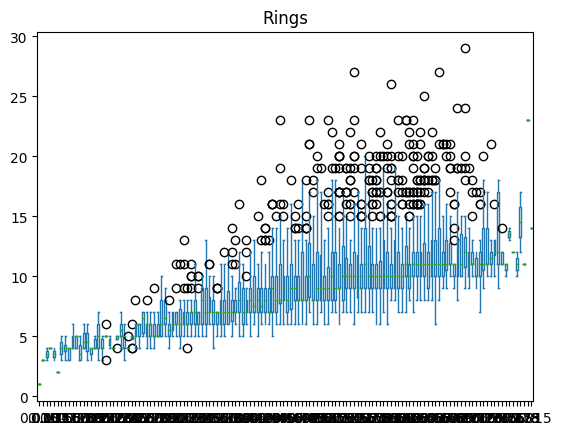

In [ ]:
_ = abalone.plot.box(column="Rings", by="Length")

Script:
* This situation tends to happen when the x-axis is continuous, but can usually be managed with rounding.

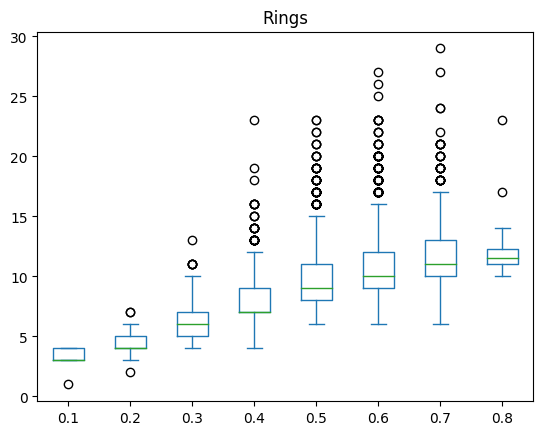

In [ ]:
abalone_rounded = abalone.copy()
abalone_rounded["Length"] = abalone_rounded["Length"].round(1)
abalone_rounded.plot.box(column="Rings", by="Length")
None

Script:
* Let's try to get a more compact view showing the relationship between the target column and the input columns.
* To do this, I will start with the scatter plots again, but using subplots to get them all on the same screen together.

In [ ]:
plot_columns = [c for c in abalone.columns if c != "Rings"]

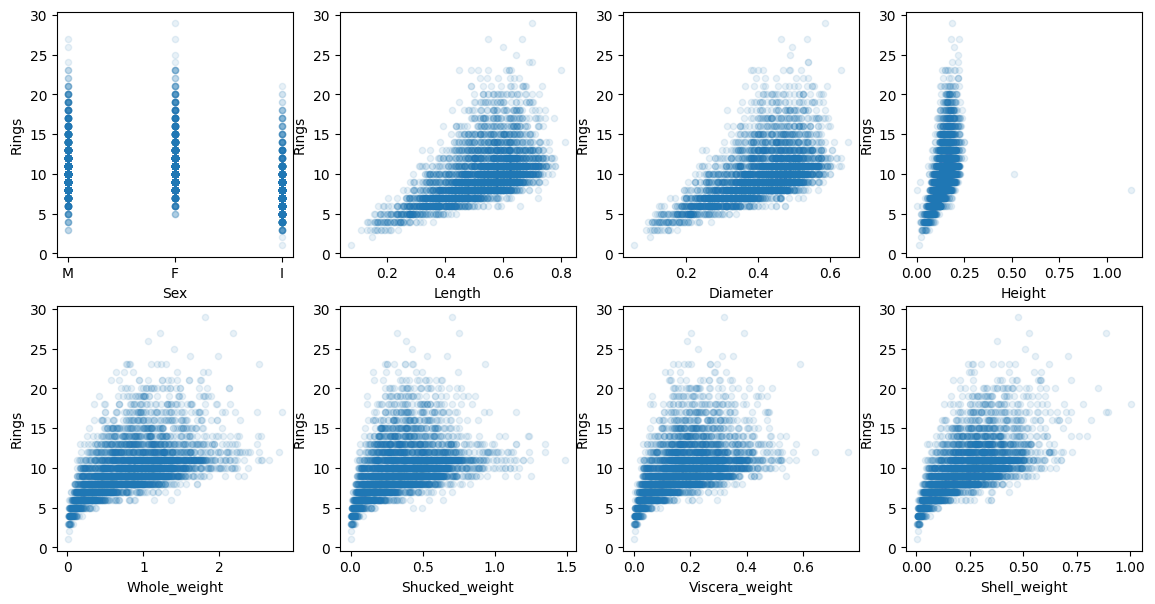

In [ ]:
num_cols=4
num_rows=(len(plot_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    abalone.plot.scatter(c, "Rings", alpha=0.1, ax=plt.gca())
    plt.xlabel(c)
    plt.ylabel("Rings")


Script:
* Since those scatter plots are so diffuse, I'd like to plot the averages too.
* Let's just do the averages for a moment.

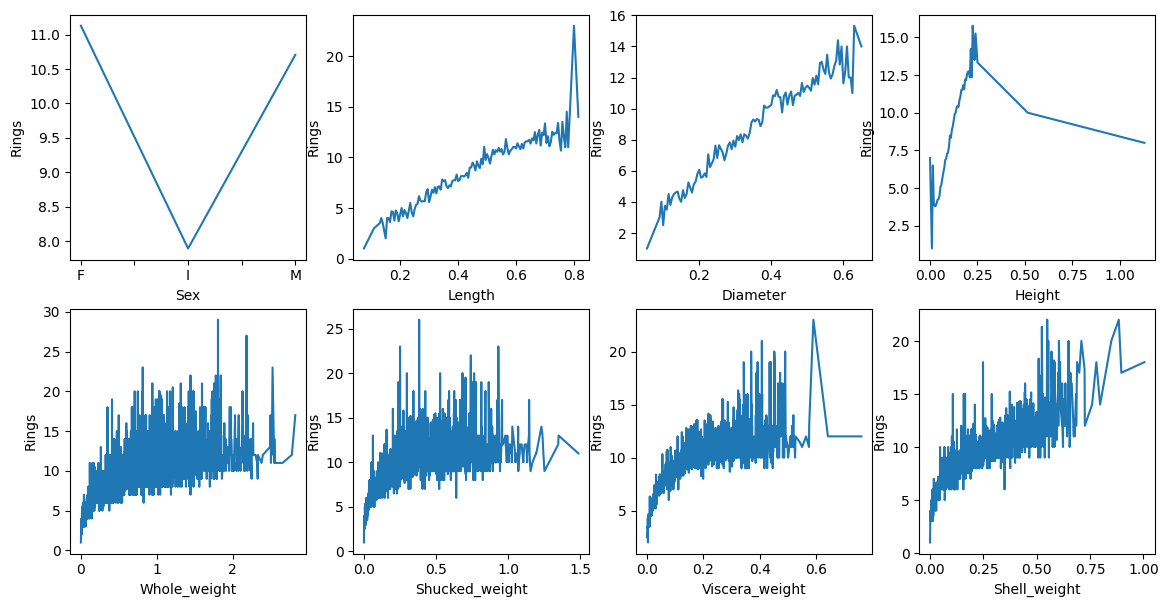

In [ ]:
num_cols=4
num_rows=(len(plot_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    abalone_c = abalone.groupby(c)["Rings"].mean()
    abalone_c.plot(y="Rings")
    plt.xlabel(c)
    plt.ylabel("Rings")
    plt.xlabel(c)

Script:
* Those plots are pretty noisy, but I'm going to ignore it for now.
* Smoothing details tend to vary on a case by case, or column by column basis.
* Next, I am going to make a much bigger, more comprehensive view.

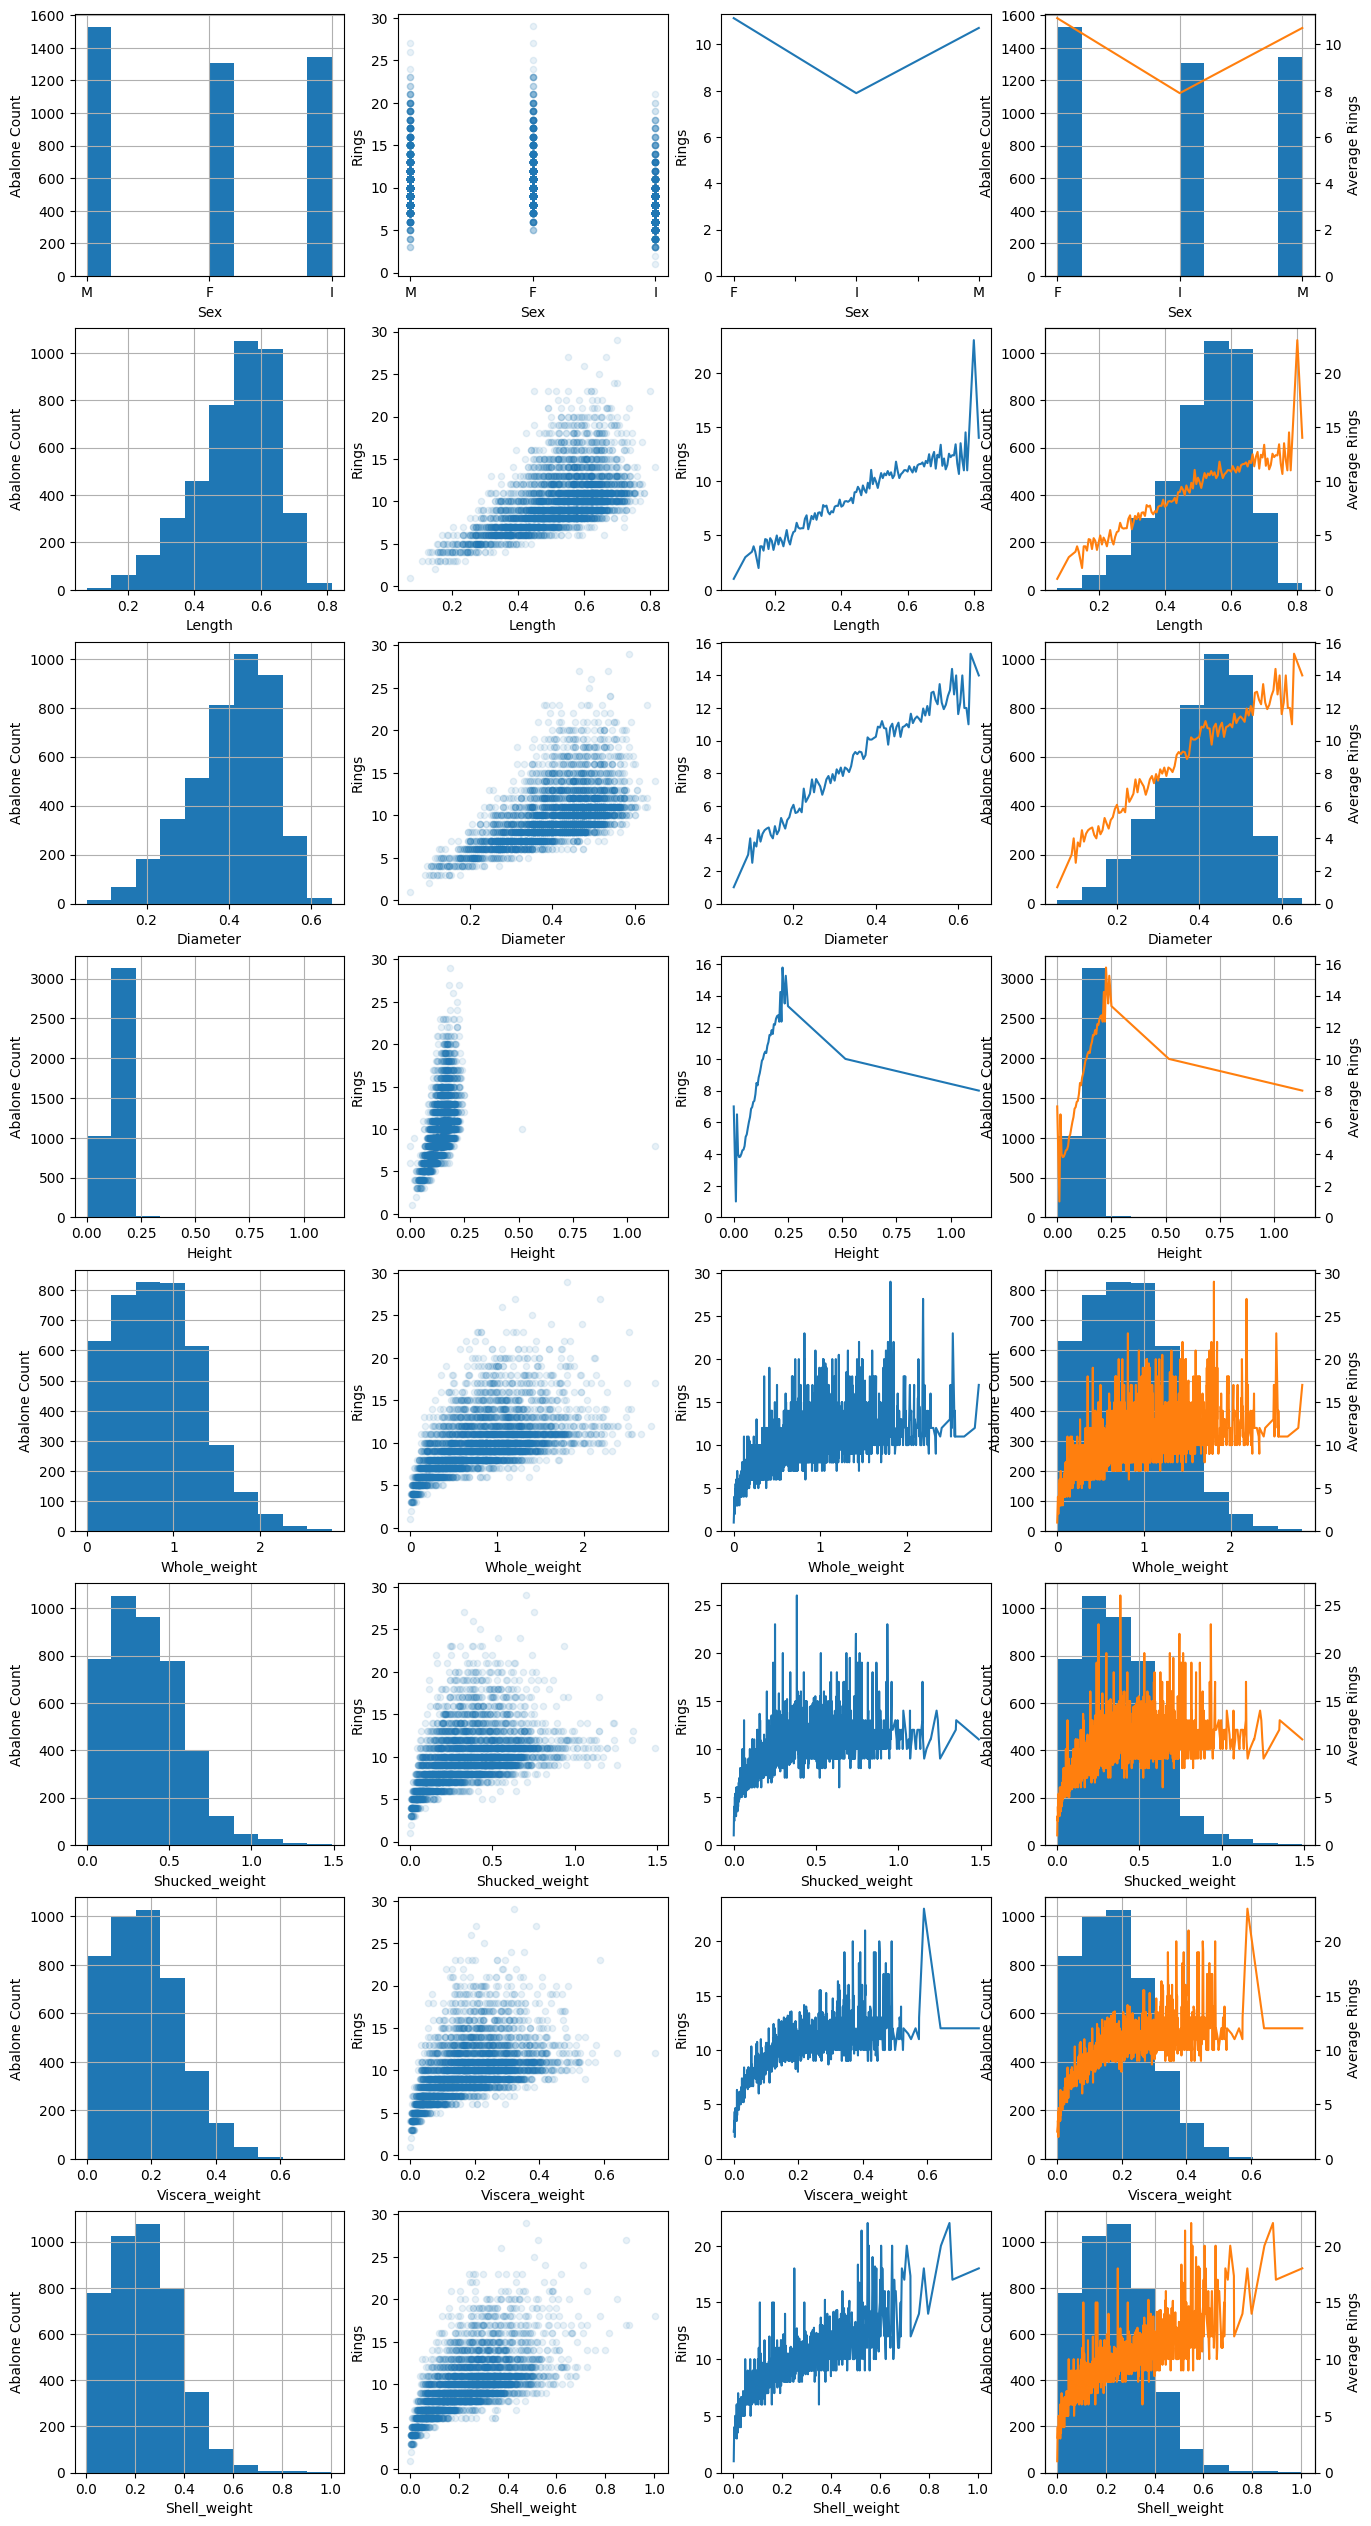

In [ ]:
num_cols = 4
num_rows = len(abalone.columns)

plt.figure(figsize=(4 * num_cols, 4 * num_rows))

for (i, c) in enumerate(plot_columns):
    plt.subplot(num_rows, num_cols, num_cols * i + 1)
    abalone[c].hist()
    plt.xlabel(c)
    plt.ylabel("Abalone Count")

    plt.subplot(num_rows, num_cols, num_cols * i + 2)
    abalone.plot.scatter(c, "Rings", alpha=0.1, ax=plt.gca())
    plt.xlabel(c)
    plt.ylabel("Rings")

    plt.subplot(num_rows, num_cols, num_cols * i + 3)
    abalone_c = abalone.groupby(c)["Rings"].mean()
    abalone_c.plot(y="Rings")
    plt.ylabel("Rings")
    plt.gca().set_ylim(0)

    plt.subplot(num_rows, num_cols, num_cols * i + 4)
    abalone[c].hist(label="Count")
    plt.ylabel("Abalone Count")
    abalone_c.plot(y="Rings", secondary_y=True)
    plt.ylabel("Average Rings")
    plt.gca().set_ylim(0)

None

Script:
* This view combines histograms, scatter plots of the target distribution, line charts of the averages, and finally, the last chart of each row combines the histogram and average charts.
* You don't need to do these all the time, but you can see an evolution of the views and different information being available in all of them.
* The scatter plot has the most information, but you have to ponder it a bit to mentally extract the other charts.
* PAUSE
* Besides all these charts, there is a more table-based option you can consider for columns with few distinct values.

In [ ]:
for c in abalone.columns:
    if len(abalone[c].unique()) <= 10:
        print(abalone.groupby(c)["Rings"].describe())

      count       mean       std  min  25%   50%   75%   max
Sex                                                         
F    1307.0  11.129304  3.104256  5.0  9.0  10.0  12.0  29.0
I    1342.0   7.890462  2.511554  1.0  6.0   8.0   9.0  21.0
M    1528.0  10.705497  3.026349  3.0  9.0  10.0  12.0  27.0


Script:
* For this abalone dataset, only the sex column had fewer than ten distinct values.


## Visualizing with One Input Variable

* Easy case: just look at all of them.

Script:
* Wrapping up, when you are only considering one input variable at a time, you can usually look at each one individually, or at least chart each one to look at.
* Usually the setup will be repetitive.
* The input variable becomes the x-axis, and you pick the chart type based on your goals.
